In [109]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [152]:
data = pd.read_csv('crypto_data_cleaned.csv' ,index_col=0).dropna()

In [153]:
# Daily Linear Returns (%)
datareturns = data.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [154]:
ndata=(data-data.min())/(data.max()-data.min())

In [156]:
datareturns = (datareturns-datareturns.min())/(datareturns.max()-datareturns.min())

In [43]:
#data = (data_raw - data_raw.mean()) / data_raw.std()

In [150]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(datareturns)
# ndata = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)

In [ ]:
# datareturns

In [111]:
# ndata=(data-data.min())/(data.max()-data.min())

In [ ]:
ndata

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f14a71ccc90> has a label of '_ADAUSDT_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f14a71db3d0> has a label of '_BTCUSDT_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f14a71db990> has a label of '_TRXUSDT_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 

<Figure size 1152x360 with 0 Axes>

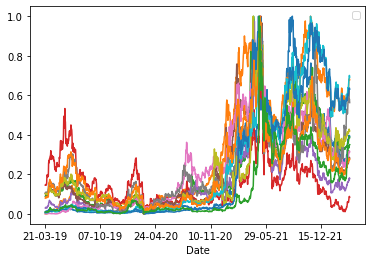

In [157]:
# Visualizing Log Returns for the DJIA 
#plt.figure(figsize=(16, 5))
#plt.title("AAPL Return")
#plt.ylabel("Return")
plt.figure(figsize=(16, 5))
ndata.plot()
#plt.grid(True);
plt.legend()

#plt.show()

In [158]:
# Dividing the dataset into training and testing sets
percentage = int(len(ndata) * 0.8)
X_train = ndata[:percentage]
X_test = ndata[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = ndata.columns.values
n_tickers = len(stock_tickers)

In [159]:
'''PCA !!'''
pca = PCA()
PrincipalComponent=pca.fit(X_train)

In [160]:
#FIRST PC / Eigenvector
pca.components_[0]

array([0.27200576, 0.36826955, 0.27174051, 0.1200435 , 0.26222228,
       0.31503916, 0.31311176, 0.2584105 , 0.25598431, 0.29015106,
       0.33785205, 0.26301498, 0.19046103])

In [161]:
len(pca.components_)

13

,Explained Variance
0,87.73%
1,92.73%
2,96.12%
3,97.50%
4,98.45%
5,98.94%
6,99.28%
7,99.52%
8,99.66%
9,99.77%


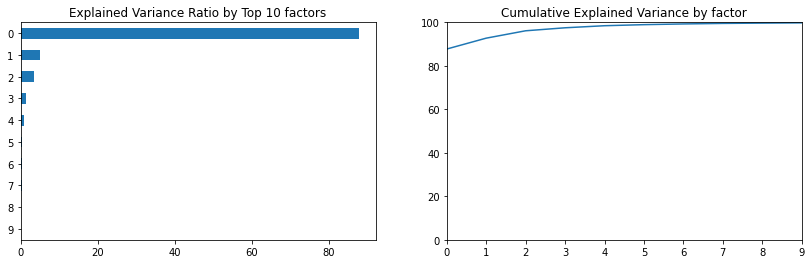

In [162]:
#Explained Variance per EigenVector
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

In [163]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()
print(pca.components_[0])
weights[0]

[0.27200576 0.36826955 0.27174051 0.1200435  0.26222228 0.31503916
 0.31311176 0.2584105  0.25598431 0.29015106 0.33785205 0.26301498
 0.19046103]


array([0.07731156, 0.10467239, 0.07723617, 0.03411968, 0.07453082,
       0.08954284, 0.08899502, 0.07344741, 0.07275782, 0.08246896,
       0.0960269 , 0.07475613, 0.05413429])

   _ADAUSDT_  _BTCUSDT_  _TRXUSDT_  _EOSUSDT_  _NEOUSDT_  _XLMUSDT_  \
0   0.272006   0.368270   0.271741   0.120043   0.262222   0.315039   
1  -0.005684  -0.551918   0.179331   0.461650   0.114159  -0.175022   
2   0.427464  -0.060051  -0.105374  -0.398653  -0.070454  -0.229386   
3  -0.306251  -0.198641   0.290358  -0.413614   0.380069  -0.193775   
4   0.164508   0.320483   0.259385  -0.072502  -0.140964  -0.108894   

   _LINKUSDT_  _ZECUSDT_  _XRPUSDT_  _ETHUSDT_  _BNBUSDT_  _LTCUSDT_  \
0    0.313112   0.258411   0.255984   0.290151   0.337852   0.263015   
1   -0.352371   0.129106   0.324236  -0.036218   0.184241   0.002662   
2   -0.013661  -0.298586  -0.049721   0.331537   0.230400  -0.354302   
3    0.348470   0.098813   0.267756  -0.188815   0.196051  -0.338750   
4   -0.544860  -0.198302   0.199959  -0.145847   0.425671  -0.006459   

   _ETCUSDT_  
0   0.190461  
1   0.353813  
2   0.453558  
3  -0.194009  
4  -0.432751  
   _ADAUSDT_  _BTCUSDT_  _TRXUSDT_  _EOSUSDT_  _NE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14a70eafd0>],
      dtype=object)

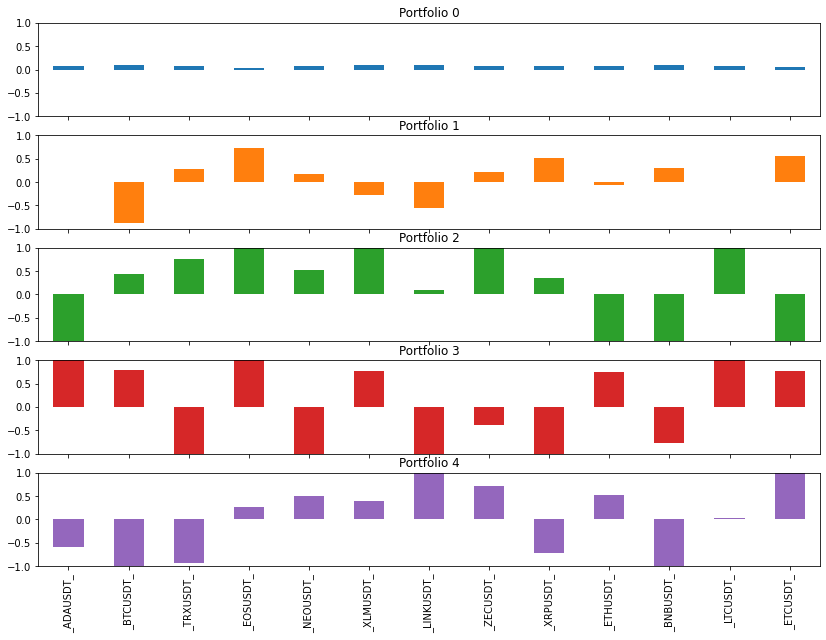

In [164]:
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=data.columns)
print(topPortfolios.head(5))
#Divide obs by the SUM of ROW (so... make each row sum to 1.0)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)

print(eigen_portfolios.head(5))
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

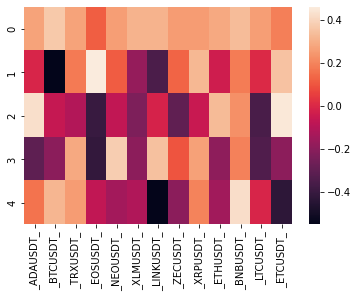

In [165]:
# plotting heatmap 
sns.heatmap(topPortfolios)

In [166]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


Eigen portfolio #5 with the highest Sharpe. Return inf%, vol = 35982.23%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
          Return         Vol         Sharpe
5            inf  359.822277  1.797693e+308
11           inf   37.807399  1.797693e+308
0   4.239189e+41    1.794183   2.362741e+41
4   5.965564e+41    4.780085   1.248004e+41
1   6.853691e+36    2.914293   2.351751e+36
7   4.967775e+18    8.727421   5.692145e+17
6  -1.000000e+00   31.475904  -3.177033e-02


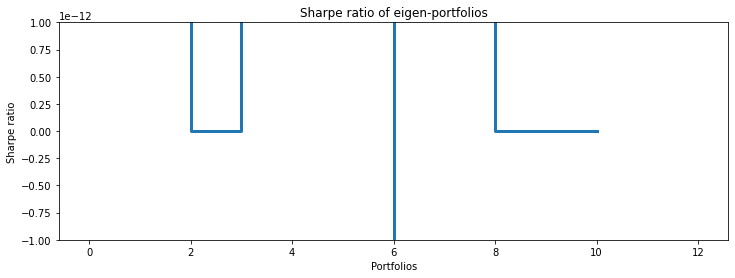

In [167]:
def optimizedPortfolio():
    #Initialize Arrays for saving values
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = ndata.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        pc_w = pcs[i] / sum(pcs[i])
        #print(pc_w,pc_w.squeeze() * 100)
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)
    
    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()
    
optimizedPortfolio()# results not upto mark 
#top portfolio has unrealstic Sharp ratio and returns 

In [91]:
#ndata = (data_raw - data_raw.mean()) / data_raw.std()